# Seaborn: FacetGrid

In [2]:
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
penguins = sns.load_dataset('penguins')

In [9]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Intro Visuals

In [26]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [27]:
sns.set_style('white')

In [28]:
pen_ex = penguins[penguins.species.isin(['Adelie', 'Chinstrap'])]

In [29]:
pen_ex.body_mass_g.describe()

count     219.000000
mean     3710.730594
std       436.250355
min      2700.000000
25%      3400.000000
50%      3700.000000
75%      3987.500000
max      4800.000000
Name: body_mass_g, dtype: float64

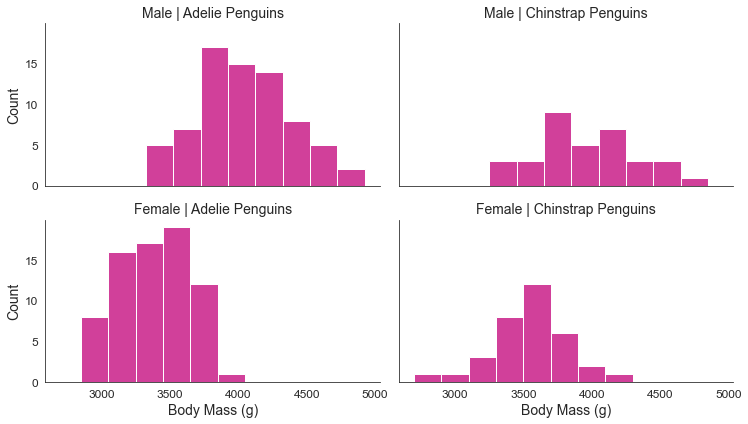

In [30]:
g = sns.FacetGrid(pen_ex, row='sex', col='species', aspect=1.75)
g.map_dataframe(sns.histplot, x='body_mass_g', binwidth=200, color='xkcd:magenta')  
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
g.set_axis_labels('Body Mass (g)', "Count")

plt.tight_layout()
#plt.savefig('15facetgrid_thumb.png', dpi=200);

In [31]:
plt.rc('xtick', labelsize=10)  # more info  https://www.geeksforgeeks.org/matplotlib-pyplot-rc-in-python/ 
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)  

## Basics

In [32]:
sns.set_style('white')

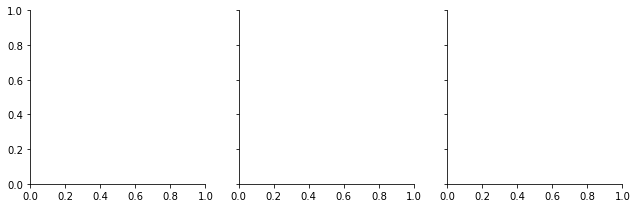

In [5]:
g = sns.FacetGrid(penguins, col='island');

In [34]:
penguins['island'].nunique()

3

In [35]:
type(g)

seaborn.axisgrid.FacetGrid

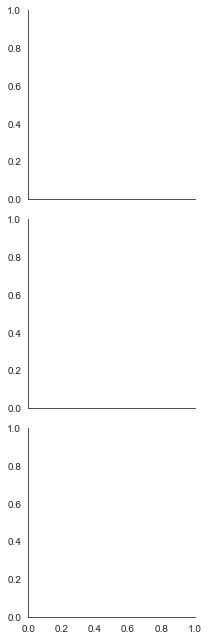

In [36]:
g = sns.FacetGrid(penguins, row='island'); 

### `.map()`

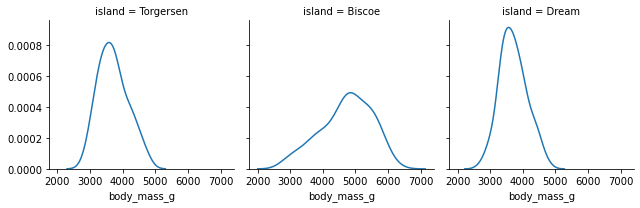

In [10]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.kdeplot, "body_mass_g"); # what about kde? # can we try to use x = flipper_length_mm?

### `.map_dataframe()`

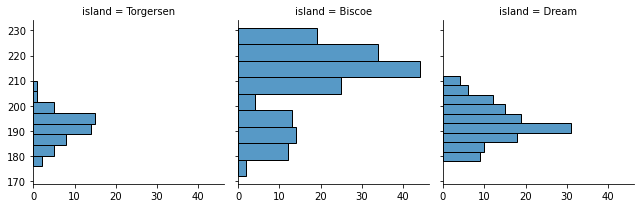

In [11]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm');  # allows for named arguments instead of just positional arguments 

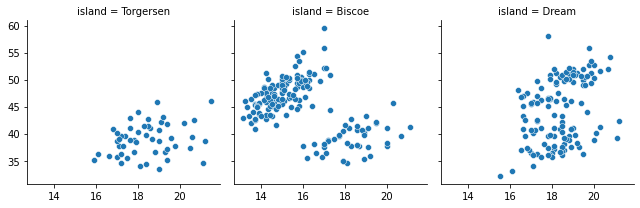

In [12]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm');

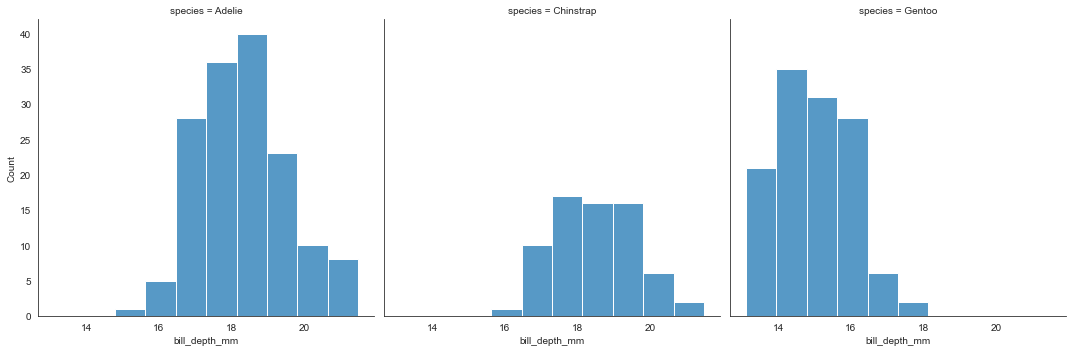

In [40]:
foo = sns.displot(data = penguins, x = 'bill_depth_mm', col = 'species')

In [41]:
type(foo)

seaborn.axisgrid.FacetGrid

## Methods and Attributes

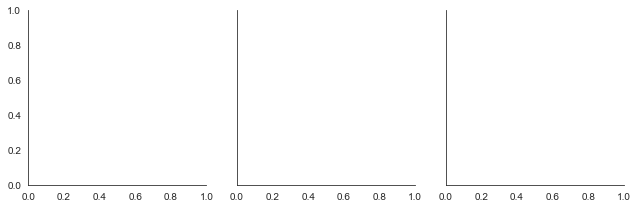

In [42]:
g = sns.FacetGrid(penguins, col='island');

In [43]:
# g. # Hit TAB to see properties and methods   if tab doesn't work for u, try this 

# dir(g)  

# to get only user methods - the ones without the underscore 

# [m for m in dir(g) if not m.startswith('_')]

SyntaxError: invalid syntax (<ipython-input-43-4a867cb89d5a>, line 1)

In [ ]:
g?

In [ ]:
help(g) # the last part contains the methods with description

### `.set_axis_labels()`

In [ ]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm');  

**what if we want to a title specific for each plot? let's see..** 

### `.set_titles()`

In [ ]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} island');  #  change island with another word

In [ ]:
g = sns.FacetGrid(penguins, col='island', row='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} Island', row_template='{row_name}');

why do we have empty plots?  examine the dataset 

### `sharey, ylim`

In [ ]:
g = sns.FacetGrid(penguins, col='island', sharey=False, height = 5, ylim=(20, 70))  # what if we remove the ylim? misleading?

g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')
g.set_axis_labels('bill_depth_mm', 'bill_length_mm')
g.set_titles(col_template='{col_name} Island');

## Hue and Custom Functions

### `hue`

In [ ]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm')  # what if we add hue in map method instead?
g.add_legend();

### `palette`

In [ ]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm') 
g.add_legend();

### Custom Functions

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


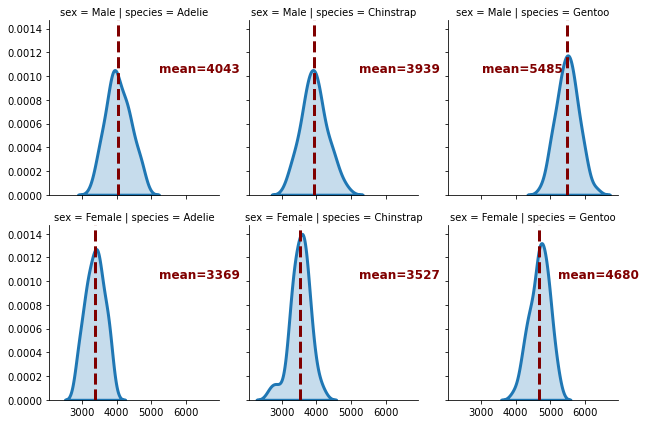

In [15]:
quantity='body_mass_g'  #can we change this variable?

g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity) #map_dataframe accepts any function as long as it has a data argument!
# g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

# sns.kdeplot()